# DS_PRACTICAL

1. Students- Here we provide you with 2 datasets associated with 2 differently 
modeled progress. Note: the data is example data and doesn’t show the 
students’ actual performance rates. With the different progress models we are aiming 
to improve our performance indicators. One performance indicator is consistency in time 
between submissions for the students. We are interested in evaluating if either of these
two models is performing better in terms of time between submissions. How would you evaluate this?



## Intriduction

The task of determining which of the two progress models is performing better in terms of consistency in time between submissions for students suggests the solution of hypothesis testing hence the main solution provided for the problem. Before such an analysis, a key question is how the performance indicator for the hypothesis testing is calculated.

For this, the performance indicator needs to be conceptualized in order to operationalize its evaluation based on the data available.

The following need to be translated to a tangible analytic solution for the performance indicator to be analyzed.



Time between submission: For a given student, the time between submission is the difference between the approved date for a submission and the approved date for the immediate past submission. In other words, for submission 1, 2, 3, the time between submission 3 and 2 is the difference in approved date between submission 3 and 2. For submission 1, there is no previous submission so the corresponding date between subission is not caculable hence a missing value. This logic is repeated for each student and submission in order to estimate the time between submission for all students and submission in each of the progress models. A key assumption is that approved date is the date that a submission is accepted and denoted as having occurred.



Consistency in time between submission: is operationaliized to be how much of a variation is noted in the estimated time between submission for students in a progress model. Statistically, this is estimated as variance in the estimated time between submissions. Thus, if there is a high inconsistency in time between submission, one will expect a high variance which implies a higher standard deviation from the mean time between submission for students in a progress model.



Using the identified approach above, the variance in time between submission for students in progress model A and B are estimated and compared. A progress model with a lower variance suggests a better consistency in time between submission. Nonetheless, for a progress model to be considered as performing better in attaining consistency in time between submission than a different progress model, not only does it need to attain a lower variance in time between submission but more importantly, there need to be a statistically significant difference in variance in time between submissions for the progress models.


The conceptualization above in terms of how to evaluate which of the progress models is performing better is implemented in python below.

### Data access

The data is in a numbers file hence the individual datasets need to be retrieved first and converted to 

a dataframe. Before that all the modules required for the analysis are imported as follows. 




In [40]:
# import modules

import pandas as pd
from numbers_parser import Document
import os
import scipy.stats as stats
import pingouin as pg


In [12]:
# function to access the data

def get_data_from_numbers_file(data_filepath: str, tab: int):
    doc = Document(data_filepath)
    sheets = doc.sheets
    tables = sheets[tab].tables
    data = tables[0].rows(values_only=True)
    df = pd.DataFrame(data[1:], columns=data[0])
    return df



# function to get the full pathname for the data file

def get_data_path(folder_name: str, file_name: str):
    cwd = os.getcwd()
    return f"{cwd}/{folder_name}/{file_name}"



The functions defined to get location for where the data is located and also for retrieving the 
data are implemented below. The various datasets are viewed to identify features that will be needed for 
the task.

In [14]:
# get the full filepath for the dataset

datapath = get_data_path(folder_name='', file_name='student_-_exercise_progress.numbers')

# get data for tab 1

df_0 = get_data_from_numbers_file(data_filepath=datapath, tab=0)

# show first 5 rows of data
df_0.head()


,exercise_id,name,position,min_task_time_in_min,max_task_time_in_min
0,8306.0,Exercise 1,1.0,240.0,360.0
1,8307.0,Exercise 2,2.0,240.0,360.0
2,8308.0,Exercise 3,3.0,60.0,180.0
3,8309.0,Exercise 4,4.0,60.0,180.0
4,8310.0,Exercise 5,5.0,60.0,180.0


The data retrieved from the first sheet as shown above has variables none of which is required to 

complete the first task as conceptualized above. The data in the second sheet is retrieved below 

In [15]:
df_1 = get_data_from_numbers_file(data_filepath=datapath, tab=1)

df_1.head()

,student_id,name,start_date,target_completion_date,progress_percent,test_variable
0,45727.0,Student 1,2020-08-13 00:00:00+00:00,2020-12-15 00:00:00+00:00,22.0,b
1,45566.0,Student 2,2020-08-09 00:00:00+00:00,2020-12-15 00:00:00+00:00,52.0,b
2,45641.0,Student 3,2020-08-11 00:00:00+00:00,2020-12-15 00:00:00+00:00,49.0,b
3,46150.0,Student 4,2020-08-23 00:00:00+00:00,2021-01-05 00:00:00+00:00,36.0,a
4,46852.0,Student 5,2020-09-07 00:00:00+00:00,2021-01-19 00:00:00+00:00,24.0,b


The data retrieved from the second sheet has variables such as student_id and test_variable which are 
needed for the task. 


### Progress model

Progress model to be tested is represented by test_variable with the values identified as follows;

In [16]:
### progress model == test_variable
# test variables has following values

df_1['test_variable'].value_counts()

b    196
a    193
Name: test_variable, dtype: int64

It is noted that 193 students were assigned to progress model A and 196 students were assigned to progress model B.

Next, the dataset for submissions is read 

In [18]:
df_2 = get_data_from_numbers_file(data_filepath=datapath, tab=2)

df_2.head()

,submission_id,student_id,exercise_id,state,approval_date,average_answer_time_in_hours
0,343141.0,40243.0,8433.0,approved,2020-04-19 00:00:00+00:00,7.540
1,397957.0,42906.0,8433.0,approved,2020-09-02 00:00:00+00:00,7.440
2,398759.0,43515.0,8434.0,approved,2020-09-04 00:00:00+00:00,18.420
3,381763.0,43515.0,8433.0,approved,2020-07-26 00:00:00+00:00,3.520
4,395175.0,43660.0,8434.0,approved,2020-08-29 00:00:00+00:00,15.705


From the third sheet which is the submission data, the approval date from each submission is identified for calculating the time between submission.

However, this dataset alone does not provide information on which student made the submission and the progress model 
the student belong to. Given that the focus is on the time between submission for students, all the other datasets 
has to be merge. Given that there is no feature that is common to all the datasets, the merging of the dataset 
is done in a pairwise manner on columns that are in both dataset as follows.




In [22]:
## merge submission data with exercise data

df2_df_merge = df_2.merge(right=df_0, on='exercise_id', how='left')


# merge the combined submission and exercise data with student data

all_merge_df =  df2_df_merge.merge(right=df_1, how='left', on='student_id')
all_merge_df.head()


,submission_id,student_id,exercise_id,state,approval_date,average_answer_time_in_hours,name_x,position,min_task_time_in_min,max_task_time_in_min,name_y,start_date,target_completion_date,progress_percent,test_variable
0,343141.0,40243.0,8433.0,approved,2020-04-19 00:00:00+00:00,7.540,Exercise 11,11.0,60.0,180.0,Student 355,2020-02-29 00:00:00+00:00,2021-01-05 00:00:00+00:00,22.0,a
1,397957.0,42906.0,8433.0,approved,2020-09-02 00:00:00+00:00,7.440,Exercise 11,11.0,60.0,180.0,Student 205,2020-05-26 00:00:00+00:00,2021-02-01 00:00:00+00:00,22.0,b
2,398759.0,43515.0,8434.0,approved,2020-09-04 00:00:00+00:00,18.420,Exercise 21,21.0,60.0,180.0,Student 122,2020-06-12 00:00:00+00:00,2021-01-14 00:00:00+00:00,45.0,b
3,381763.0,43515.0,8433.0,approved,2020-07-26 00:00:00+00:00,3.520,Exercise 11,11.0,60.0,180.0,Student 122,2020-06-12 00:00:00+00:00,2021-01-14 00:00:00+00:00,45.0,b
4,395175.0,43660.0,8434.0,approved,2020-08-29 00:00:00+00:00,15.705,Exercise 21,21.0,60.0,180.0,Student 207,2020-06-17 00:00:00+00:00,2021-01-27 00:00:00+00:00,49.0,b



The data displayed above is a sample of the merged dataset which contains all the variables required 
for the analysis. A simple description of the variables in the merged dataset is shown below.

In [23]:

all_merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 8498
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                          
---  ------                        --------------  -----                          
 0   submission_id                 8499 non-null   float64                        
 1   student_id                    8499 non-null   float64                        
 2   exercise_id                   8499 non-null   float64                        
 3   state                         8499 non-null   object                         
 4   approval_date                 8369 non-null   datetime64[ns, Timezone('UTC')]
 5   average_answer_time_in_hours  8499 non-null   float64                        
 6   name_x                        8499 non-null   object                         
 7   position                      8499 non-null   float64                        
 8   min_task_time_in_min          8499 non-null   float64     

From above, the a total of 8499 individual submissions have been made by students of which 8369 has 
been approved. Only submissions that have been approved hence have an approval date can used for the analysis.





### Estimating time between submissions for students
The following steps were used to estimate the time between submissions for students

1. Remove missing values in approval_date. Submissions which are yet to be approved has no date hence cannot be used.
2. Sort the data based on student_id and approval_date variables
3. Group the data by student_id variable
4. Find the consecutive differences (rowise) between approval_date for each submission





In [27]:
# make copy of all merged data
submission_df = all_merge_df.copy()

## remove missing values and sort_values
submission_df_narm = submission_df.dropna(subset='approval_date').sort_values(by=['student_id', 'approval_date'])

#group by student_id and compute time between submissions
submission_df_narm['submission_time_interval'] = submission_df_narm.groupby('student_id')['approval_date'].diff()

# get number of days as float from time between submissions and assign to new columns
submission_df_narm['submission_time_interval_days'] = submission_df_narm['submission_time_interval'].dt.days

# select some columns and view data

submission_df_narm[['student_id', 'submission_id', 'approval_date', 'submission_time_interval','submission_time_interval_days', 'test_variable']]




,student_id,submission_id,approval_date,submission_time_interval,submission_time_interval_days,test_variable
3704,39960.0,326977.0,2020-02-22 00:00:00+00:00,NaT,NaN,a
3703,39960.0,327411.0,2020-02-23 00:00:00+00:00,1 days,1.0,a
3700,39960.0,327711.0,2020-02-24 00:00:00+00:00,1 days,1.0,a
3701,39960.0,327697.0,2020-02-24 00:00:00+00:00,0 days,0.0,a
3702,39960.0,327681.0,2020-02-25 00:00:00+00:00,1 days,1.0,a
...,...,...,...,...,...,...
1898,47814.0,415323.0,2020-10-08 00:00:00+00:00,3 days,3.0,b
1895,47814.0,417048.0,2020-10-12 00:00:00+00:00,4 days,4.0,b
1896,47814.0,417018.0,2020-10-12 00:00:00+00:00,0 days,0.0,b
1897,47814.0,416986.0,2020-10-12 00:00:00+00:00,0 days,0.0,b


The table above depicts submission_time_interval variable as an estimate of the time between submissions in days.


With this, the performance indicator can now be estimated. Variance in submission_time_interval_days variable is estimated for each progress model (test_variable) as follows:








### Estimating consistency in time between submission with variance

In [29]:

# create progress model A with time between submission
progress_model_a_df = submission_df_narm[submission_df_narm['test_variable']== 'a']['submission_time_interval_days'].dropna()

# create progress model B with time between submission
progress_model_b_df = submission_df_narm[submission_df_narm['test_variable']== 'b']['submission_time_interval_days'].dropna()

# estimate variance in progress model A

progress_model_A_variance = statistics.variance(progress_model_a_df)

# estimate variance in progress model B
progress_model_B_variance = statistics.variance(progress_model_b_df)


print(f"Variance in time between submission for progress model A: {progress_model_A_variance: .2f}")

print(f"Variance in time between submission for progress model B: {progress_model_B_variance: .2f}")


Variance in time between submission for progress model A:  28.03
Variance in time between submission for progress model B:  25.88


An important question that arise from comparing the variance noted in progress model A to model B is whether the difference is by chance or
the model type is responsible for the variance. In order to answer the question of whether one model is performing better than the other, 
a hypothesis need to be tested for them. The hypothesis to be tested are stated as follows:
    
    
Null Hypothesis (H0): There is no statistically significant difference in variance between progress model A and B

Alternate Hypothesis (H1): There is statistically significant difference in variance between progress model A and B



Having defned the hypothesis to be tested, the method to adopt needs to be determine. This is dependent on the dataset following assumptions required. A parametric method such as Student t-test requires the data to be normally distributed and variance to be homogeneous for the two groups with same sample size. When these assumptions are not captured by the data then a non-parametric method such as Welch's t-test can be used.


These assumptions need to be verified to decide on the method for the analysis. Shapiro-Wilk method will be used to determine whether the data is normally distributed and levene method to determine whether groups are homogeneous.


#### Shapiro-Wilk test 
Shapiro-Wilk has the following hypthesis:
    
Null hypothesis (H0): There is no difference between the distribution of the data and a normal distribution


Alternate hypothesis (H1): There is a difference between the distribution of the data and a normal distribution


This is verified as follows:

In [36]:
# shapiro test
model_a_shapiro = stats.shapiro(progress_model_a_df)


model_b_shapiro = stats.shapiro(progress_model_b_df)

print(f"Shapiro test for Porgress model A showed a p-value of {model_a_shapiro[1]}")

print(f"Shapiro test for Porgress model B showed a p-value of {model_b_shapiro[1]}")

Shapiro test for Porgress model A showed a p-value of 0.0
Shapiro test for Porgress model B showed a p-value of 0.0


The shapiro test with p-value of 0.00 which is less than 0.05 calls for rejection of the null hypothesis that the data is not different from a normal distribution.

### Levene test 

Levene test has the following hypothesis:
    
    
Null hypothesis (H0): Variance is homogeneous between the two progress models


Alternate Hypothesis (H1): Variance is not homogeneous between the two progress models



Levene test is implemented as follows:
    



In [38]:
## run levene test 
model_levene_test = stats.levene(progress_model_a_df, progress_model_a_df)


print(f"Levene test show a p-value of {model_levene_test[1]}")

Levene test show a p-value of 1.0


With a p-value of 1.0 with is greater than 0.05, the null hypothesis fails to be rejected. By this, variance is 
homogeneous hence a parametric method such as Student t-test will used to test the main hypothesis. Given that, the data is also not normally distributed, Welch's test will also be used to compare results. This is implemented as follows:


In [44]:

# Student ttest
student_ttest = pg.ttest(progress_model_a_df, progress_model_b_df, correction=False)

student_ttest

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.405538,7978,two-sided,0.685093,"[-0.27, 0.18]",0.00908,0.027,0.06904


In [45]:
# Welch test

welch_test = pg.ttest(progress_model_a_df, progress_model_b_df, correction=True)


welch_test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.40538,7949.955691,two-sided,0.685209,"[-0.28, 0.18]",0.00908,0.027,0.06904


From the results of the Student t-test, p-value is 0.685 which is greater than 0.05 hence the null hypothesis that 
there is no statistically significant difference in the performance between progress model A and B in attaining consistent time 
between submissions fails to be rejected. 



## Conclusion

It is concluded that despite, progress model B had a lower variance (25.88) hence variations between time for submission were relatively 
less and more consistent compared to progress model A (variance of 28.03), the difference is likely random and attributable to chance.
The type of model is not the likely reason for a better consistency. Hence progress model B is achieving lower variance in 
submission time but no adequate evidence exist to support the notion that it is doing better than progress model A.







# QUESTION 2

2. Submissions- We are interested in discovering about how student,
exercise and submission features contribute to the likelihood of a 
submission being passed or not. Create (or describe how you would create) an 
ML model which attempts this. What challenges do you face? What additional 
information would you like to have? Is your solution production-ready?

## Problem statement

As an educational company in the tech industry with the mission of becoming the most human-centric company, the success of students is a key factor that needs to be prioritized. Among others, the timely completion of studies will lay a good foundation as the first step to making progress towards meaningful careers. For this to be possible, student need to pass exercises that they submit for evaluation. This presents an avenue to analyze various factors that contribute to submissions being passed and by so doing harness the opportunity to optimize factors that enhance the likelihood of submissions being passed and curtail those that lead to not being passed. The absence of a mechanism or tool that enables this understanding to be gain is a challenge to be solved in this task using a data driven approach.


### Research Question

1. How do various known factors about student, exercise, and submission influence the likelihood of passing a submission?


### Research Objective

1. To analyze the impact of various factors on the likelihood of passing a submission


### Expected Results

A machine learning model that explains the influence of various factors on the likelihood of passing a submission will be produce. The result is expected to be discussed in this report.



In developing a machine learning model, the end goal is one of the major factors that determines the end-product of the modeling process. The focus of this task is deduced to be interpretability rather than precision or prediction accuracy of the machine learning model to be developed since the aim is to discover how factors contribute to a submission being passed rather than accurately predicting whether or not a submission will be passed. Thus, the focus will be to use models that yields ease of interpretation and less computationally expensive rather than a more complex and highly optimized model for perfect prediction. This assertion informed the methodology employed here with no focus on tuning hyperparameters.




With the problem statement and user requirement identified, the whole modeling process can be defined to include data exploration, model development and evaluation, packaging and deployment into production environment. For this task, focus is mainly on detailing data exploration and modeling.


## Exploratory data analysis

#### Identifying variables to be used

Determining the type of variables present for the modeling exercise is key to deciding on the category 
from which a machine learning algorithm can be choosen.

For this, the task indicates the presence of a target variable hence a supervised machine learning model will be used. The problem statement also depicts that a binary target variable is expected with the classes of either passed or not passed a submission hence binary classification algorithm will be used.


The statistical properties of the target and predictor variables are also analyzed to determine the algorithm to be used. 

In order to gain a clear understanding of the variables present, the data is imported for the analysis. Also variable names that will be used often as arguments in the analysis are stored in namespace


In [69]:
# import all models required for the analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from argparse import Namespace
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [73]:
args = Namespace(
    target_variable = 'state',
    target_variable_transformed = 'state_category',
    predictor_variables = ['average_answer_time_in_hours', 'progress_percent', 'test_variable_transform'],
    numeric_features = ['progress_percent', 'average_answer_time_in_min', 'extra_time_min',
                        ],
    categorical_features = ['work_rate'],
    binary_feature = ['test_variable_transform'],
    predictors = ['progress_percent', 'average_answer_time_in_min', 'extra_time_min',
                  'work_rate', 'test_variable_transform'],
    selected_predictors = ['progress_percent', 'extra_time_min', 'work_rate',
                        ],
    selected_numeric_features = ['progress_percent', 'extra_time_min']

)

In [48]:
## The process of merging all the files is repeated here just to make sure task 2 is independent of task 1


datapath = get_data_path(folder_name='', file_name='student_-_exercise_progress.numbers')

exercise_df = get_data_from_numbers_file(data_filepath=datapath, tab=0)

student_df = get_data_from_numbers_file(data_filepath=datapath, tab=1)

submission_df = get_data_from_numbers_file(data_filepath=datapath, tab=2)


submit_exercise_df = submission_df.merge(right=exercise_df, on='exercise_id', how='left')

all_df =  submit_exercise_df.merge(right=df_1, how='left', on='student_id')
all_df.head()



,submission_id,student_id,exercise_id,state,approval_date,average_answer_time_in_hours,name_x,position,min_task_time_in_min,max_task_time_in_min,name_y,start_date,target_completion_date,progress_percent,test_variable
0,343141.0,40243.0,8433.0,approved,2020-04-19 00:00:00+00:00,7.540,Exercise 11,11.0,60.0,180.0,Student 355,2020-02-29 00:00:00+00:00,2021-01-05 00:00:00+00:00,22.0,a
1,397957.0,42906.0,8433.0,approved,2020-09-02 00:00:00+00:00,7.440,Exercise 11,11.0,60.0,180.0,Student 205,2020-05-26 00:00:00+00:00,2021-02-01 00:00:00+00:00,22.0,b
2,398759.0,43515.0,8434.0,approved,2020-09-04 00:00:00+00:00,18.420,Exercise 21,21.0,60.0,180.0,Student 122,2020-06-12 00:00:00+00:00,2021-01-14 00:00:00+00:00,45.0,b
3,381763.0,43515.0,8433.0,approved,2020-07-26 00:00:00+00:00,3.520,Exercise 11,11.0,60.0,180.0,Student 122,2020-06-12 00:00:00+00:00,2021-01-14 00:00:00+00:00,45.0,b
4,395175.0,43660.0,8434.0,approved,2020-08-29 00:00:00+00:00,15.705,Exercise 21,21.0,60.0,180.0,Student 207,2020-06-17 00:00:00+00:00,2021-01-27 00:00:00+00:00,49.0,b


### Describing variables in the dataset

In [51]:
# get description of the various variables in the dataset
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 8498
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                          
---  ------                        --------------  -----                          
 0   submission_id                 8499 non-null   float64                        
 1   student_id                    8499 non-null   float64                        
 2   exercise_id                   8499 non-null   float64                        
 3   state                         8499 non-null   object                         
 4   approval_date                 8369 non-null   datetime64[ns, Timezone('UTC')]
 5   average_answer_time_in_hours  8499 non-null   float64                        
 6   name_x                        8499 non-null   object                         
 7   position                      8499 non-null   float64                        
 8   min_task_time_in_min          8499 non-null   float64     

## Variable selection

### Target variable selection and transformation

From the variables in the dataset, state is identified as the target variable. The variable is described below


In [56]:
all_df[['state']].nunique()

print(f"Number of values (classes) in state variable: {all_df[['state']].nunique()}")

print(f"The unique values in the state variable are as floows: {all_df['state'].unique()}")
all_df['state'].unique()

Number of values (classes) in state variable: state    5
dtype: int64
The unique values in the state variable are as floows: ['approved' 'almost_there' 'waiting_for_review' 'a_little_more' 'not_yet']


array(['approved', 'almost_there', 'waiting_for_review', 'a_little_more',
       'not_yet'], dtype=object)

The unique values in state shows that contrary to only two classes of values, 5 classes are present. 

The state variable will 
be transformed to a binary one by reclassifying all submissions that were not approved as not passed and those approved as passed.


The second form of transformation to be applied to the target variable is to convert it to numeric values. Generally, 
machine learning algorithms only handle numeric values well and not strings.

The transformation of the target variable is implemented as follows: 


In [62]:
# list of values for non-approved submissions
not_passed = ['waiting_for_review', 'almost_there', 'not_yet', 'a_little_more']

# approved submissions are classied as 1 others 0 to get a numeric binary variable
transform_state_variable = lambda x: 0 if x in not_passed else 1


# apply transform data
all_df['state_category'] = all_df[args.target_variable].apply(transform_state_variable)

# now target variable is binary with only 2 values
all_df['state_category'].nunique()


2

### Visualize target variable distribution

A possible challenge that is faced for machine classification models is unbalanced data. The target variable is analyze and visualized to find the proportion of each class in the dataset.


In [64]:

all_df['state_category'].value_counts()

1    8369
0     130
Name: state_category, dtype: int64

Text(0.5, 1.0, 'Distribution of pass (1) and not passed (0)')

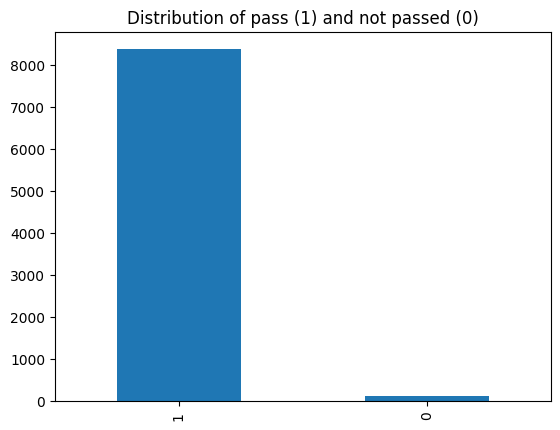

In [66]:
all_df['state_category'].value_counts().plot(kind='bar')
plt.title("Distribution of pass (1) and not passed (0)")

The bar graph above shows that the data is unbalanced with 8369 submissions passed and 130 not passed.

By this a random model which only predicts the majority class will be very accurate in predicting the majority class while having a higher error margin for the minority class. 

In a classification task where the focus is on the minority class with the aim of achieving a high accuracy on the minority class, a number of techniques are available to achieve that at the expense of the majority class. This include oversampling 
the minority class, undersampling the majority class and using class weights for the modeling among others.

Given that the aim of this task is not to achieve high precision on the majority or minorty class, a model design that tradeoffs high accuracy in the majority class to achieve a compromised and balance accuracy in both classes is made.

By this, unbalanced dataset is handled by using class weight that balances the model.

## Predictor variables selection and transformation

Predictor variables can be grouped into categorical and numerical variables. In selecting variables, a decision is made not to select variables that introduce curse of dimensionality and increase the feature space exponentially when transformed. By this, categorical variables with high cardinality are not selected. This include categorical variables with many unique values. To investigate this categorical variables are first identified and then the number of unique values is calculated.



### Handling of categorical predictor variables

The variables submission_id, student_id, exercise_id and test_variable are identified as categorical hence analyzed to determine if it is of high cardinality as follows;


In [68]:

list_categorical = ['submission_id', 'student_id', 'exercise_id', 'test_variable']

# analyze number of unique values in each categorical variable
for variable in list_categorical:
    print(f'{variable} has {all_df[variable].nunique()} values')

submission_id has 8499 values
student_id has 389 values
exercise_id has 34 values
test_variable has 2 values


On the basis of high cardinality, submission_id, student_id and exercise_id are not selected to be included in the model. 

Intutively, these variables are less likely to provide meaningful signals to model the likelihood of passing a submission. 


test_variable is binary hence it is selected and subjected to further test to determine whether it has a 
statistically significant relationship with the target variable for it to be selected for modeling. 
For this, a chi squared test of independence is undertaken. Chi squared test is used because both variables are categorical. 


First test_variable is transformed to be numeric. The process is implemented as follows;


In [74]:
# reclassify progress model A as 0 and B as 1
transform_test_variable = lambda x: 0 if x == 'a' else 1


# apply transform data

all_df['test_variable_transform'] = all_df['test_variable'].apply(transform_test_variable)

# create crosstab
test_state_crosstab_df = pd.crosstab(all_df['test_variable_transform'], all_df[args.target_variable_transformed], margins = False)


test_state_crosstab_df.columns = ['not-passed', 'passed']
test_state_crosstab_df.index = ['0', '1']


# chi squared test
chi2_contingency(observed=test_state_crosstab_df)


(2.9479174282714906,
 0.08598830136419744,
 1,
 array([[  64.21226027, 4133.78773973],
        [  65.78773973, 4235.21226027]]))

With a p-value of 0.859 which is greater than 0.05, the null hypothesis that there is a no statistically significant 
relationship between passing a submission and progress model fails to be rejected. Hence test_variable is not 
selected for the modeling.




## Categorical feature engineering

An important component of machine learning process is developing new features that have predictive powers 
to augment available data. This is demonstrated here.

Some variables may not be directly relevant for the model but can be used to develop other variables. Such variables
have been identified as min_task_time_in_min and max_task_time_in_min. These variables will be used in conjunction
with average_answer_time_in_hours (to be converted to minutes) to create work_rate variable.


It is hypothesized that the rate at which a student work to complete an exercise is likely to influence 
whether or not the submission will be passed.  Work rate is conceptualized as a categorical variable with three 
categories namely slow, normal and fast. 


Work rate is operationalized such that when average_answer_time_in_min a student used in completing an exercise 
is less than min_task_time_in_min assigned to the exercise than work rate is defined to be fast hence the student 
hurriedly completed the exercise and that could influence whether or not she will pass.


Work rate is defined to be normal when average_answer_time_in_min used is greater than or equal to min_task_time_in_min and less than or equal to max_task_time_min.


Work rate is defined to be slow when average_answer_time_in_min used to complete the exercise is greater
than max_task_time_in_min.

This process for creating work_rate variable is implemented below


In [75]:
# create function to convert hours to minute 

convert_hours_to_minute = lambda x: x * 60

# apply function to average_answer_time_in_hours to convert to minutes to be in the same unit as
# min_task_time_in_min and max_task_time_in_min

all_df['average_answer_time_in_min'] = all_df['average_answer_time_in_hours'].apply(convert_hours_to_minute)


# function to create work_rate variable
def define_work_rate(data: pd.DataFrame, 
                     min_time_alloted: str = 'min_task_time_in_min', 
                     max_time_alloted: str = 'max_task_time_in_min',
                     actual_time_used: str = 'average_answer_time_in_min'
                     ):
    data['work_rate'] = np.where((data[actual_time_used] < data[min_time_alloted]), 'fast', np.nan)
    data['work_rate'] = np.where((data[actual_time_used] >= data[min_time_alloted]) & (data[actual_time_used] <= data[max_time_alloted]), 'normal', data['work_rate'])
    data['work_rate'] = np.where((data[actual_time_used] > data[max_time_alloted]), 'slow', data['work_rate'])
    return data

# implement function for work_rate
all_df = define_work_rate(data=all_df)


### Determining whether or not work rate is related to submission being passed

The notion that work_rate will have an influence on submission being passed is based on educated guess 
hence there is the need for a statistical evidence to support the variable to be selected for modeling.

First a visualization technique is used followed by a statistical test


Text(0.5, 1.0, 'Number of submissions (pass / not pass) for various work rate')

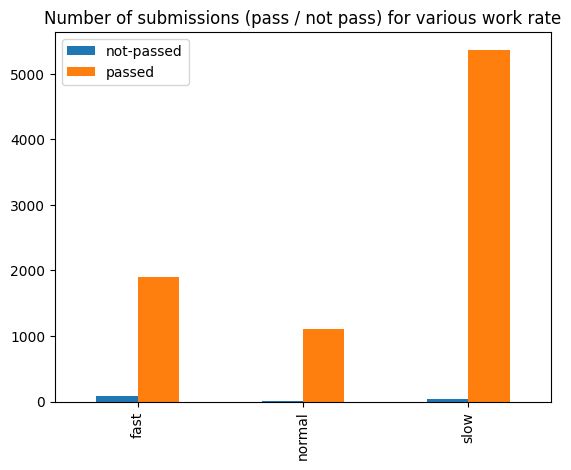

In [84]:
workrate_state_crosstab_df = pd.crosstab(all_df['work_rate'], all_df['state_category'], margins = False)

workrate_state_crosstab_df.columns = ['not-passed', 'passed']
workrate_state_crosstab_df.index = ['fast', 'normal', 'slow']


workrate_state_crosstab_df.plot(kind="bar")
plt.title('Number of submissions (pass / not pass) for various work rate')

Given the number of submissions for pass and not passed are not evenly distributed but with huge differences 

among the various work rate, it is likely that work rate has an influence on submission. The visualization is 
supported with statistical analysis as follows:

In [85]:
# chi squared test between work rate and submission
chi2_contingency(observed=workrate_state_crosstab_df)

(100.69531311429601,
 1.3623559112077784e-22,
 2,
 array([[  30.19414049, 1943.80585951],
        [  16.9325803 , 1090.0674197 ],
        [  82.87327921, 5335.12672079]]))

With p-value less than 0.05, the null hypothesis that there is no reationship between state (pass/not_pass)
and work_rate is rejected. This variable is expected to influence state hence selected to be included in the model


## Handling numeric predictor variables

Two main numeric variables have been identified for modeling as average_answer_time_in_min and progress_percent and 
feature engineering can be undertaken to create a third one.


Intuitively, the length of extra time used by a student for an exercise is likely to have an influence on whether or not the submission is passed. Conceptually, extra time variable can be computed by the difference between 
max_task_time_in_min and avg_task_time_in_min. To transform this properly, where the result is negative, it means 
the student used less than the max_task_time_in_min hence 0 is assigned as extra time.


The process of creating extra_time variable is implemented as follows


In [81]:

rescale_negative_to_zero =  lambda x: 0 if x < 0 else x


# compute extra time

def calculate_extra_time_min(data: pd.DataFrame = None, max_time_min="max_task_time_in_min", 
                             actual_time_min="average_answer_time_in_min",
                             make_negative_time_zero_minutes: callable = rescale_negative_to_zero
                             ):
    data['time_diff'] = data[actual_time_min] - data[max_time_min]
    
    data['extra_time_min'] = data['time_diff'].apply(make_negative_time_zero_minutes)
    
    return data
    

all_df_with_extra_features =  calculate_extra_time_min(data=all_df)

  

In selecting numerical variables, a key criteria used is to avoid multicollinearity. This is because variables
that are strongly correlated are redundant hence lead to overfitting. 


To check multicollinearity for variable selection, correlation analysis is undertaken as follows

In [87]:
numeric_feature = all_df_with_extra_features[args.numeric_features]


numeric_feature_correlation = numeric_feature.corr()

print('Correlation matrix for numeric variables')
numeric_feature_correlation

Correlation matrix for numeric variables


,progress_percent,average_answer_time_in_min,extra_time_min
progress_percent,1.000000,0.004964,0.002898
average_answer_time_in_min,0.004964,1.000000,0.996089
extra_time_min,0.002898,0.996089,1.000000


average_answer_time_in_min and extra_time_min are strongly positively correlated which means that including both 
variables provide very similar information signals to the model hence redundant.
Thus, one of the them is selected and the other dropped to reduce overfitting. 
In deciding which of them to include, ease of interpretability and relevance for decision
making is considered. Generally, the relevance of average_answer_time_in_min will depend
on the minimum and maximum time allocated for the exercise. Extra time is an indicator that can easily
be communicated to students in a manner that is easy to be optimized. For example,
if students are told that the probability of an exercise being passed reduces by 10% 
for every extra hour time used then, they can easily minimize using extra time and focus 
on working within time. For this reason, extra_time is used for the analysis

## Selected predictor variables

The explortory analysis undertaken has provided clues for the selection of multiple logistic regression with 
predictor variables identified as follows

1. progress_percent
2. extra_time_min
3. work_rate


It is duly recognized that a different model may actually attain a better precision. However, logistic regression 
has the advantages of being more interpretable compared to other models particularly blackbox models.

## Developing the model  

### Deciding on model evaluation metric 

Although the aim of the modeling task is to undertsand the influence of various variables, 
deciding on a good evaluation metric is critical.


First of all, because the data is highly unbalanced, accuracy is not a very good metric to use. This is because 
a high accuracy can be achieve even with a dummy model that only predicts the majority class as the outcome.

Class weight is used to balance the dataset to improve accuracy in the minority class which comes at the cost of 
reducing accuracy in the majority class. The metric to used is f1 score which is a balance between precision and recall


## Splitting dataset for modeling

In order to investigate generalizability of the model developed, the dataset is split into training and test set 

in the ratio of 70% to 30% respectively. The model is trained on 70% of the data. This is implemented as follows:

In [92]:
X = all_df_with_extra_features[args.selected_predictors]


y = all_df_with_extra_features[args.target_variable_transformed]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)



## Preprocessing data for machine learning
The preprocessing pipeline for variables to be prepared for modeling is highlighted as follows

1. Multi-class categorical variables are encoded using One-hot encoding strategy 
2. Numercial variables are scaled using the standard scaler.

The preprocessing pipeline is implemented as follows:  


In [93]:
one = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocess_pipeline =  make_column_transformer((scaler, args.selected_numeric_features),
                                                (one, args.categorical_features)
                                                )

logit_model_pipeline = make_pipeline(preprocess_pipeline,
                                    LogisticRegression(class_weight='balanced')
                                    )

## Fitting the model

After building the preprocessing and model pipeline, the model is fitted on the training data as implemented below

In [96]:
# fit model on train data

logit_model_pipeline.fit(X_train, y_train)


# using model for prediction 

y_pred= logit_model_pipeline.predict(X_test)


## Evaluating the model on test data

A report of how well the model perform on unseen data is provided below





In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.04      0.61      0.08        44
           1       0.99      0.75      0.85      2506

    accuracy                           0.75      2550
   macro avg       0.52      0.68      0.46      2550
weighted avg       0.97      0.75      0.84      2550



## How do various features contribute to submission being passed

The main focus of the modeling exercise is to undertsand how various factors influence the likelihood of
submission being passed or not hence this will be the focus of discussion. 

The question can now be answered by understanding the coefficient of the variables included in the model. 

This is undertaken as follows:





<AxesSubplot: >

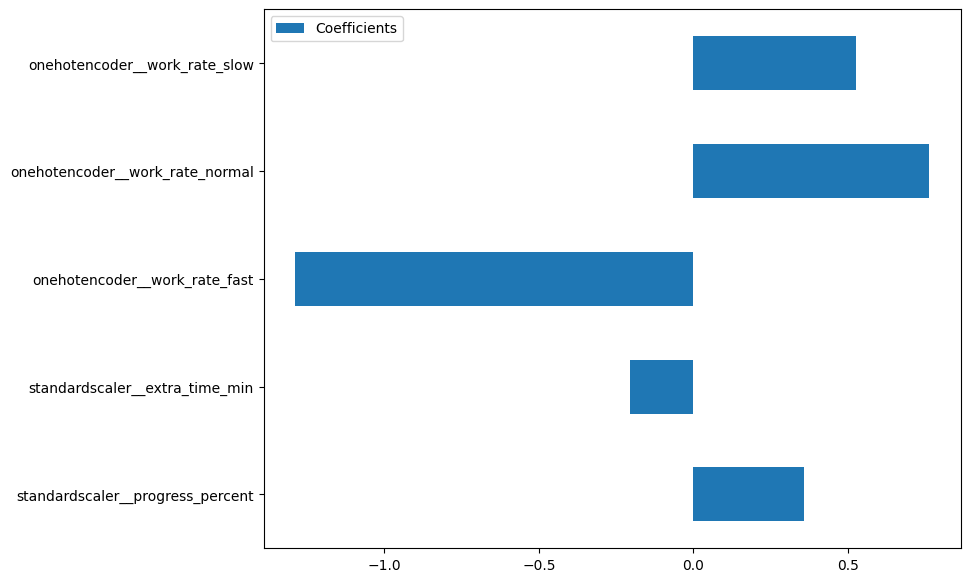

In [98]:
logit_model_pipeline.named_steps['logisticregression'].coef_


selected_model_features = logit_model_pipeline[:-1].get_feature_names_out()


model_coefs = pd.DataFrame(
    logit_model_pipeline.named_steps['logisticregression'].coef_.reshape(5,1),
    columns=["Coefficients"],
    index=selected_model_features,
)

model_coefs


model_coefs.plot.barh(figsize=(9, 7))



In [99]:
model_coefs

,Coefficients
standardscaler__progress_percent,0.356283
standardscaler__extra_time_min,-0.203697
onehotencoder__work_rate_fast,-1.287969
onehotencoder__work_rate_normal,0.763430
onehotencoder__work_rate_slow,0.524407


## Interpretation of results

The results shows that students who have attained a higher progress percent are more likely to pass their submissions.
Moreover, spending more time on an exercise beyond the max_task_time_in_min as captured by extra_time reduces the likelihood of passing submissions. In terms of work rate, students with fast work rate (use less time than the alloted minimum time for exercise) are less likely to pass their submissions compared other students who do otherwise. Moreover, students with normal work rate have a higher likelihood of passing submissions compared to others. 


## Areas of improvement of the model

1. Feature augmentation with additional features such as educational background of student, difficulty 

rating of course among others are likely to influence the likelihood of passing submission. Hence, additional features will help improve the model.


2. Hyperparameter optimization, cross-validation among other techniques of improving model accuracy have not be undertaken here. Such tasks will contribute to improving the model.

3. One of the challenges posed by the task was unbalanced data and this was handled by setting class weight to balance for he model.

4. The code is not production ready given that an exploratory approach was undertaken here. 

### A nearly production ready version is provided on github for your perusal